In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/business-analysis-junior/Business Analyst (junior).xlsx


<img src='https://babok-school.ru/wp-content/uploads/2021/09/prfcar0.png' width=1400 height=400>

<span style="color:black; font-size:20px;">CREDIT:</span><br>
<span style="color:red; font-size:20px;">
All credit for this notebook goes to Igor Panteleev. Thank you for giving me, and other Kaggle users the opportunity to practise and advance as data scientists!
</span>

<h1 style="text-align:center; 
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Test task for the position of Business Analyst (junior)</h1>

<hr>

<p style='font-size: 20px; font-family: Roboto;'>Preamble<br><br>
    In August 2023, I applied for the position of Business Analyst (Junior). I was asked to be tested through a Telegram bot. The results of this testing + additional analysis are presented in this notebook.</p>
<hr>


<h1 style="
          text-align: center;
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> EDA process</h1>

Understand the characteristics of the data at hand.<br>
• .head()<br>
• .info()<br>
• msno.matrix(...)<br>
• .astype(...)<br>
• .describe()<br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reading datasets
data_2019 = pd.read_excel('/kaggle/input/business-analysis-junior/Business Analyst (junior).xlsx', sheet_name='2019')
data_2020 = pd.read_excel('/kaggle/input/business-analysis-junior/Business Analyst (junior).xlsx', sheet_name='2020')

<hr>

<p style='font-size: 20px; font-family: Roboto;'>2019 Table

In [4]:
# Table overview
data_2019.head()

,Order number,Client ID,Product code,Date of delivery,Delivery amount
0,97058.0,7121.0,494843.0,2019-01-24,9565
1,2968.0,7167.0,111937.0,2019-01-29,18907
2,2968.0,7167.0,218889.0,2019-01-29,54132
3,45863.0,7136.0,495715.0,2019-02-07,28023
4,45863.0,7136.0,495716.0,2019-02-07,59120


In [5]:
# Data type
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order number      271 non-null    float64       
 1   Client ID         271 non-null    float64       
 2   Product code      271 non-null    float64       
 3   Date of delivery  271 non-null    datetime64[ns]
 4   Delivery amount   778 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 30.5 KB


<Axes: >

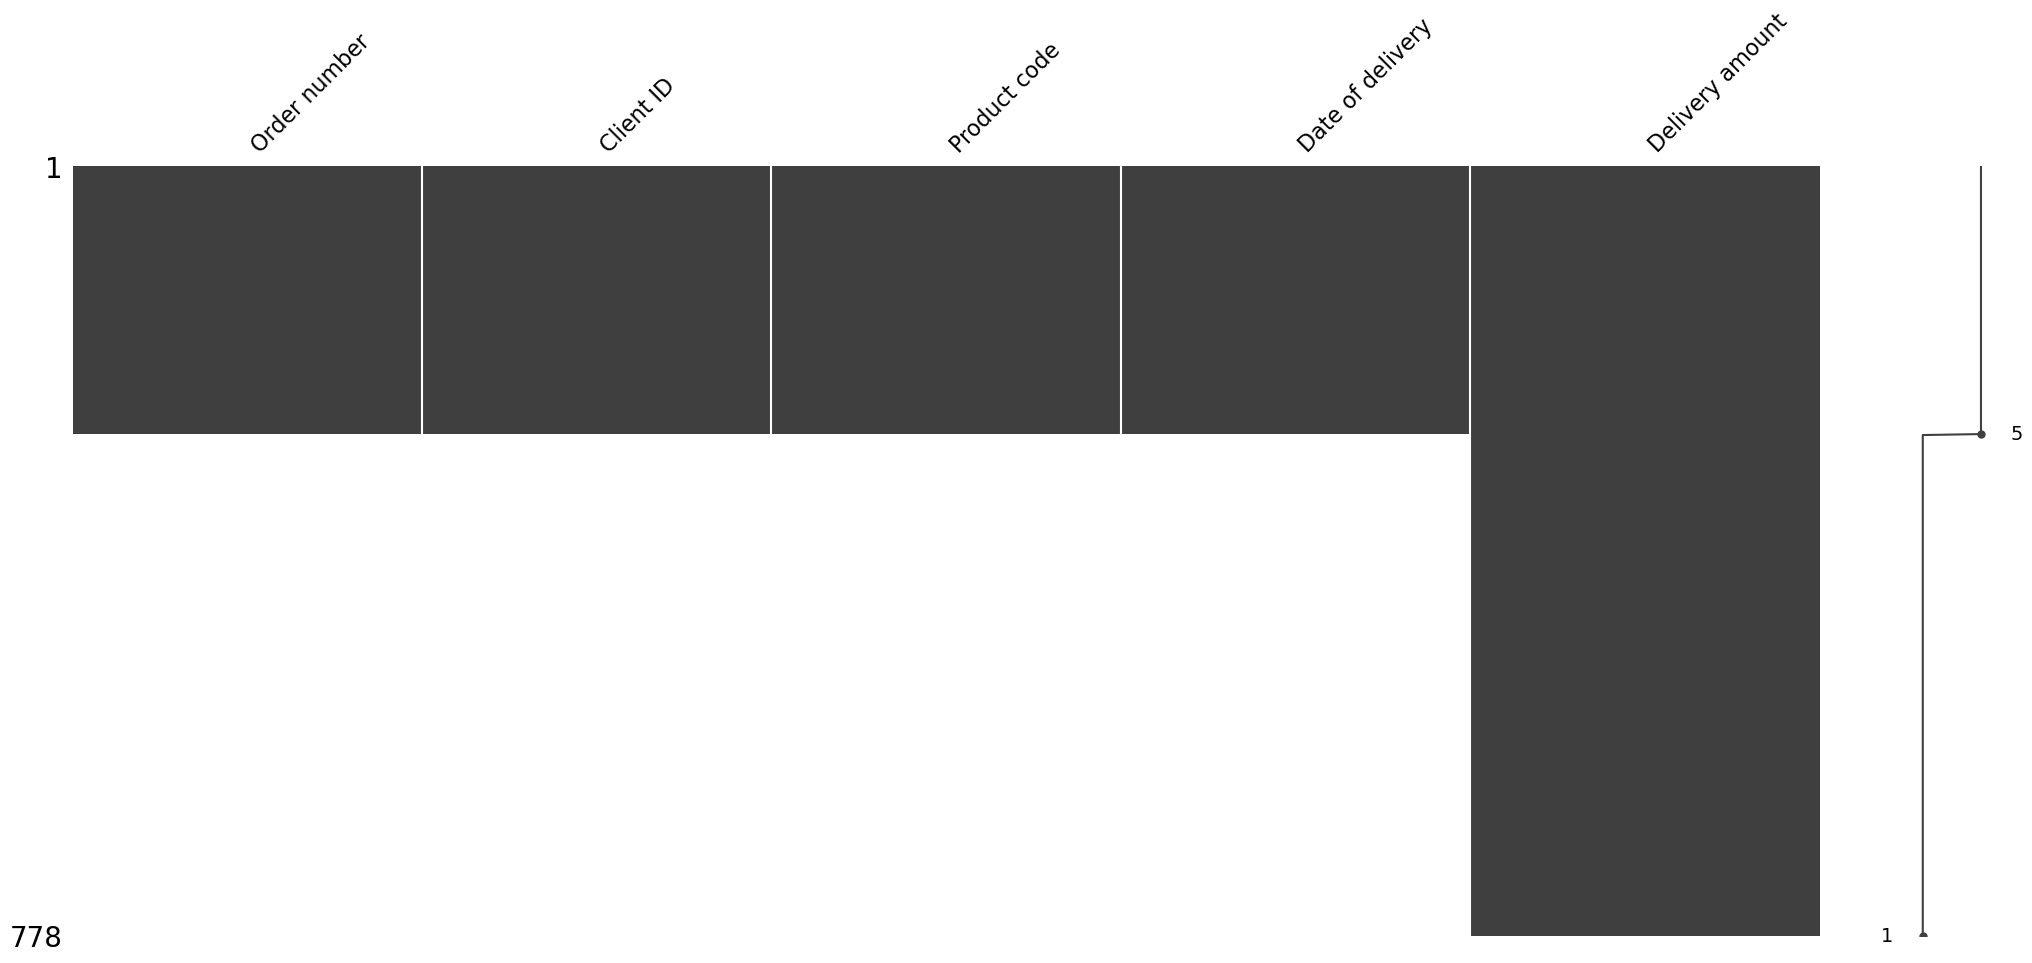

In [6]:
# Checking for missing data
msno.matrix(data_2019)

In [7]:
# Only keeping the rows with complete data
# Converting strings to int32
data_2019 = data_2019.iloc[:271, :]
data_2019 = data_2019.astype({'Client ID':np.int32, 'Order number':np.int32, 'Product code':np.int32})

<Axes: >

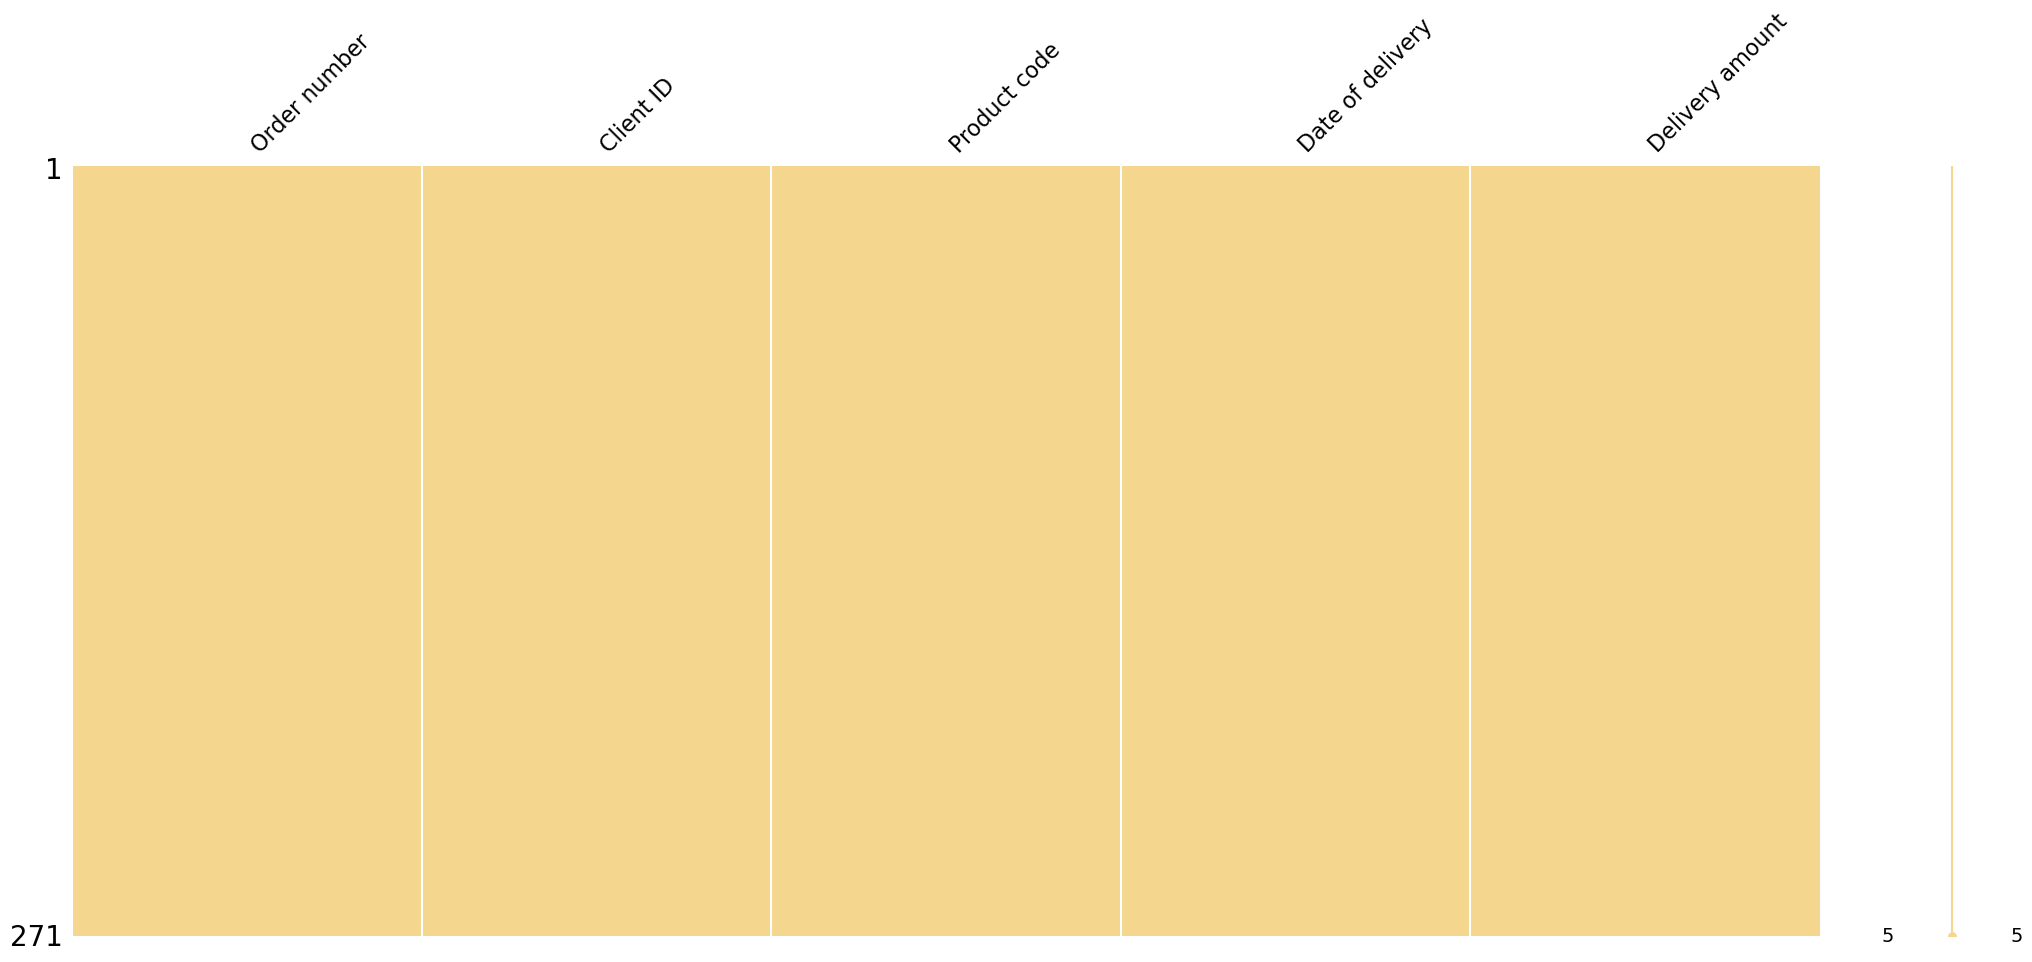

In [8]:
# Without missing data
msno.matrix(data_2019, color=(0.96, 0.84, 0.56))

In [9]:
data_2019.describe()

,Order number,Client ID,Product code,Delivery amount
count,271.000000,271.000000,271.000000,271.000000
mean,40986.944649,7137.667897,446526.763838,35093.892989
std,27813.750049,18.439502,113515.037259,18974.208401
min,2968.000000,7110.000000,111864.000000,1267.000000
25%,21924.000000,7125.000000,497028.000000,18893.500000
50%,40155.000000,7135.000000,497032.000000,37466.000000
75%,50755.000000,7155.000000,497035.000000,52605.500000
max,112601.000000,7167.000000,509369.000000,65583.000000


<hr>

<p style='font-size: 20px; font-family: Roboto;'>2020 Table

In [10]:
# Table overview
data_2020.head()

,Order number,Client ID,Product code,Date of delivery,Delivery amount
0,81318.0,7118.0,510984.0,2020-02-17,4771.0
1,29280.0,7138.0,510984.0,2020-02-19,34346.0
2,33418.0,7161.0,510984.0,2020-02-12,29026.0
3,81318.0,7118.0,510985.0,2020-02-17,37186.0
4,29280.0,7138.0,510985.0,2020-02-19,47580.0


In [11]:
# Data type
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048304 entries, 0 to 1048303
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Order number      507 non-null      float64       
 1   Client ID         507 non-null      float64       
 2   Product code      507 non-null      float64       
 3   Date of delivery  507 non-null      datetime64[ns]
 4   Delivery amount   1047810 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 40.0 MB


<Axes: >

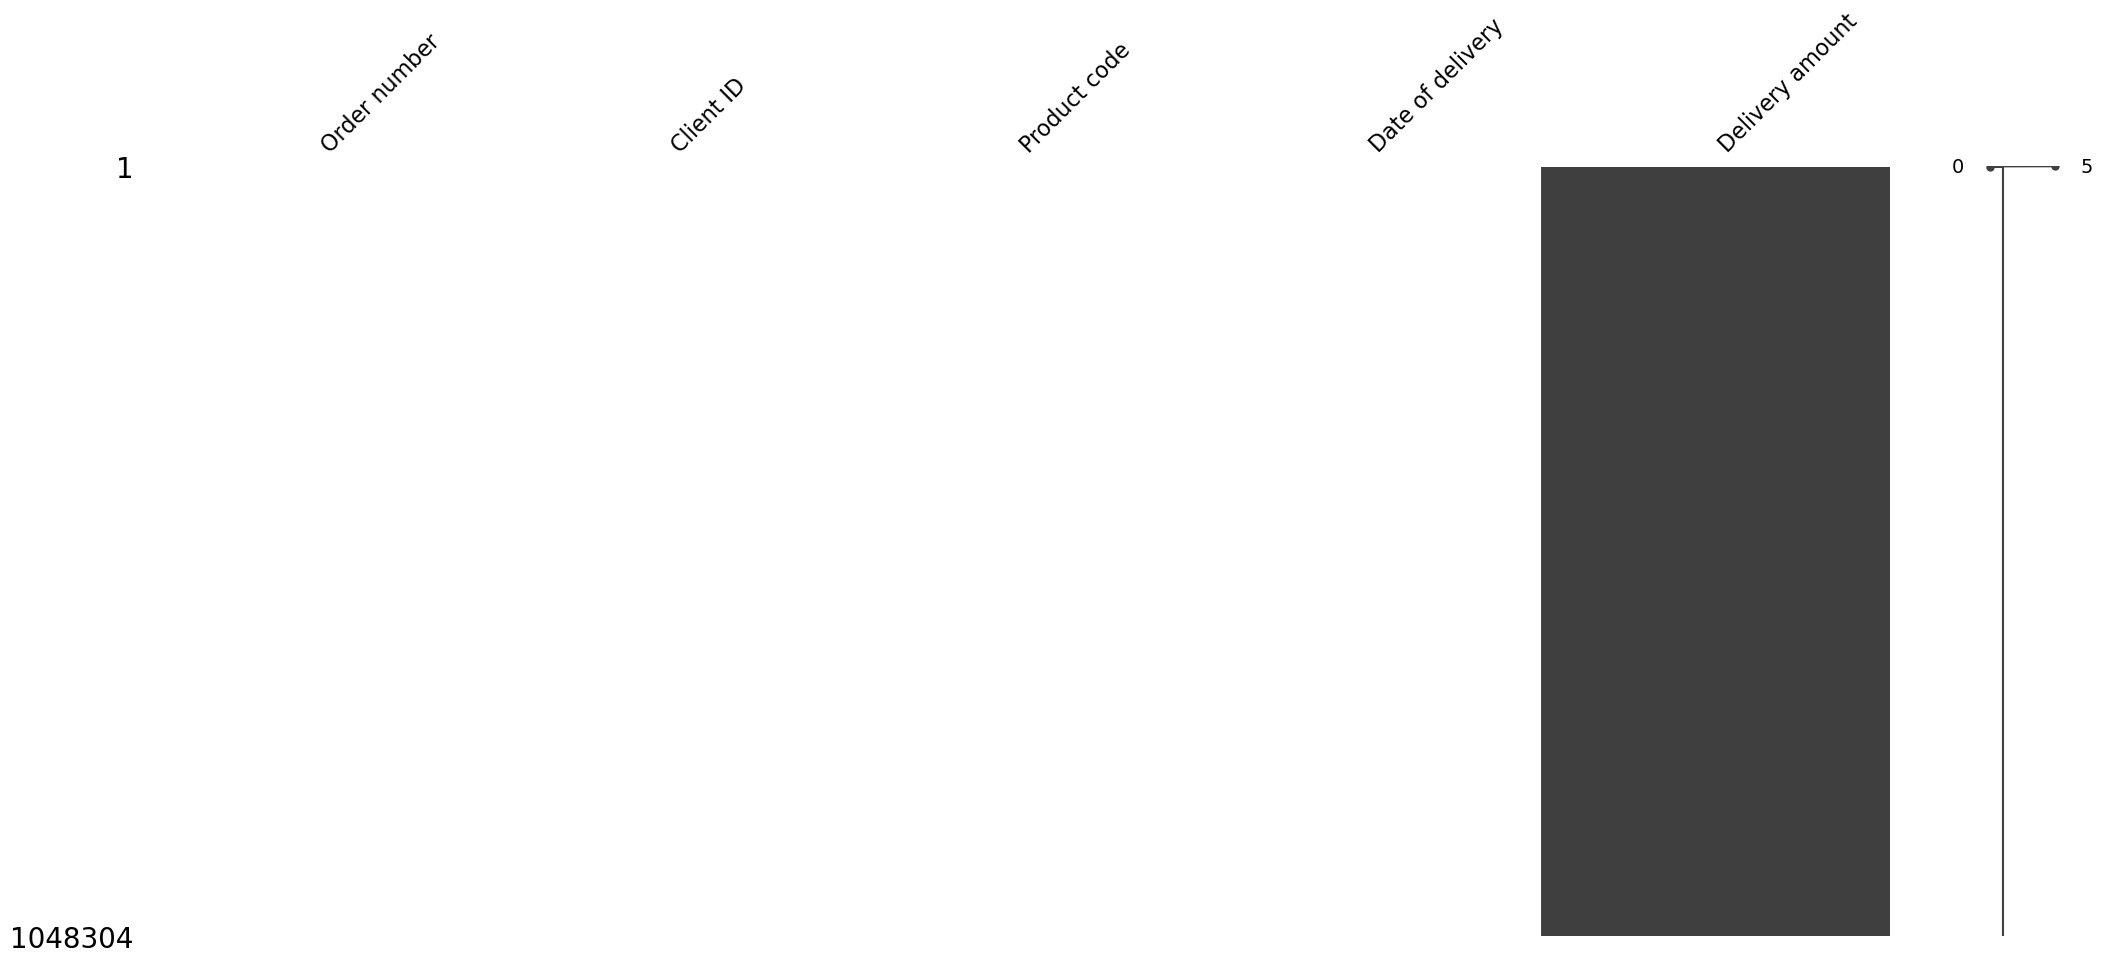

In [12]:
# Checking for missing data
msno.matrix(data_2020)

In [13]:
# Only keeping the rows with complete data
# Converting strings to int32
data_2020 = data_2020.iloc[:507, :]
data_2020 = data_2020.astype({'Client ID':np.int32, 'Order number':np.int32, 'Product code':np.int32})

<Axes: >

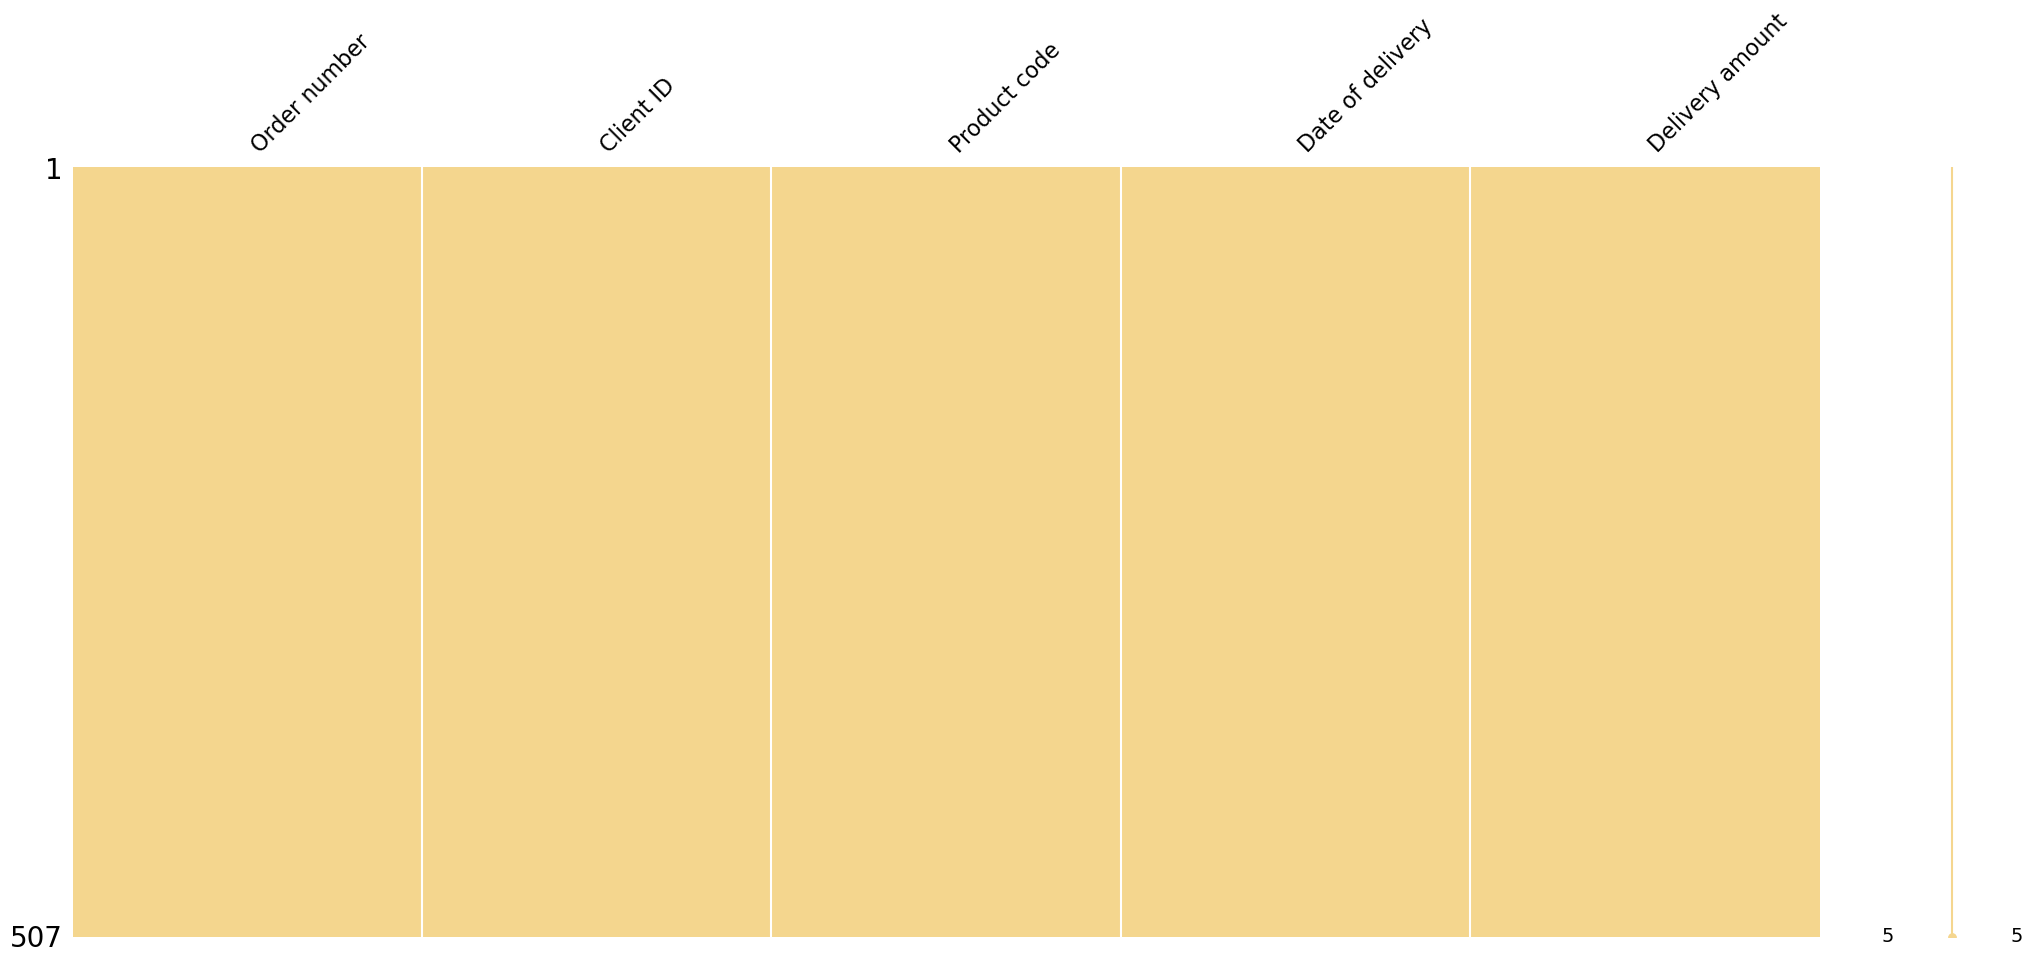

In [14]:
# Without missing data
msno.matrix(data_2020, color=(0.96, 0.84, 0.56))

In [15]:
data_2020.describe()

,Order number,Client ID,Product code,Delivery amount
count,507.000000,507.000000,507.000000,507.000000
mean,52150.370809,7137.840237,411595.812623,33227.370809
std,29487.910887,16.089919,141994.977992,19057.057157
min,3491.000000,7110.000000,111855.000000,1308.000000
25%,33760.000000,7126.000000,237553.000000,16214.000000
50%,53061.000000,7136.000000,512016.000000,32328.000000
75%,64473.000000,7158.000000,518703.000000,50635.000000
max,130090.000000,7167.000000,524468.000000,65891.000000


In [16]:
# Adding the "Year" feature, since all tasks will be focused specifically on the filter by year
data_2019['Year'] = data_2019['Date of delivery'].dt.year
data_2020['Year'] = data_2020['Date of delivery'].dt.year

<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Task 1:<br><br> Compare 2 years and identify New items (goods that began to be delivered only in 2020). Calculate the amount of delivery of Novelties for 2020.</h1>

In [17]:
# Making a 'code' list with all the 2019 Product codes
code = data_2019['Product code'].to_list()

The following code calculates the total delivery amount for goods in 2020, excluding those that were already supplied in 2019 (based on the product codes provided in the list `code`).

In [18]:
data_2020[~data_2020['Product code'].isin(code)].agg({'Delivery amount' : 'sum'})

Delivery amount    15096275.0
dtype: float64

**There was a total of 7,325,415 deliveries of 2020 products.**

<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Task 2:<br><br>Make a year-to-year comparison for sales of products that were not New. Year-to-year means not to compare by day. Find the code of the product that had the highest increase in deliveries in 2020 compared to 2019.</h1>

In [19]:
# 2019 list of unique codes with total deliveries
data_2019_count = data_2019\
    .groupby('Product code', as_index=False)\
    .agg({'Delivery amount': 'sum'})

In [20]:
# 2020 list of unique codes with total deliveries
# the first line excludes the new products
data_2020_count = data_2020[data_2020['Product code'].isin(code)]\
    .groupby('Product code', as_index=False)\
    .agg({'Delivery amount': 'sum'})

In [21]:
# Combine 2019 and 2020 Product-Deliery datasets
growth = data_2020_count.merge(data_2019_count, left_on='Product code', \
                               right_on='Product code', suffixes=(' 2019', ' 2020'))
growth.head()

,Product code,Delivery amount 2019,Delivery amount 2020
0,111864,12738.0,13018
1,111879,7494.0,5232
2,111889,13287.0,17516
3,111890,37140.0,3352
4,111927,62743.0,20579


In [22]:
# Growth in supplies between 2019 and 2020
growth['Growth in supplies 2020'] = growth['Delivery amount 2020'] - growth['Delivery amount 2019']
growth.head()

,Product code,Delivery amount 2019,Delivery amount 2020,Growth in supplies 2020
0,111864,12738.0,13018,280.0
1,111879,7494.0,5232,-2262.0
2,111889,13287.0,17516,4229.0
3,111890,37140.0,3352,-33788.0
4,111927,62743.0,20579,-42164.0


In [23]:
# Sort in descending order, leaving one product - because this is our task
growth.sort_values(by='Growth in supplies 2020', ascending=False).head(1)

,Product code,Delivery amount 2019,Delivery amount 2020,Growth in supplies 2020
39,497253,51866.0,766297,714431.0


**The code of the product with the highest increase in deliveries is 497253.**

<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Task 3:<br><br>Conduct an ABC analysis of goods for two years according to the principle: category A - 50% of all deliveries, category B - 30%, C - 20%. Compare the number of unique product codes for each ABC category year by year Determine the goods of category A in 2019 and 2020 in total (add the number of goods of category A in 2019 and 2020 and enter the figure).</h1>


**ABC analysis is based on the empirical Pareto law:**

* A - 20% of the effort (assortment) gives 80% of the result (sales)
* B - 30% of effort (assortment) gives 15% of result (sales)
* C - 50% of efforts (assortment) give 5% of results (sales)

Let's do the task and then do the right ABC analysis<hr>

In [24]:
# Defining ABC analysis function to use for 2019 and 2020 data

def ABC_analysis(data, a, b):
    #group data by product code, sum deliveries: high to low
    dfsale = data.groupby(['Product code'], as_index=False)\
        .agg({'Delivery amount':'sum'})\
        .sort_values(by='Delivery amount', ascending=False)
    #group N percentage from ABC
    dfsale['part'] = dfsale['Delivery amount']/dfsale['Delivery amount'].sum()*100
    #create a new feature 'cum_part' that will store the total amount of shares
    dfsale['cum_part']=dfsale['part'].cumsum()
    #create a new feature 'group' and use the lambda function to divide the products into 3 groups ABC
    #use separators so that we can choose the boundaries of the section ourselves
    result = dfsale['cum_part'].apply(lambda x: 'A' if x < a else ('B' if a <= x < b else 'C')).to_list()
    #return the list
    return result

In [25]:
# For 2019: group by Product, sum Deliery, high to low

dfsale_2019 = data_2019.groupby(['Product code'], as_index=False)\
    .agg({'Delivery amount':'sum'})\
    .sort_values(by='Delivery amount', ascending=False)

# use the ABC function to assign products to a group (incorrect at first)

dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 50, 80)

In [26]:
# For 2019: Count no of Products in each group
dfsale_2019['abc_group'].value_counts()

C    52
A     6
B     6
Name: abc_group, dtype: int64

In [27]:
# For 2020: group by Product, sum Deliery, high to low

dfsale_2020 = data_2020.groupby(['Product code'], as_index=False)\
    .agg({'Delivery amount':'sum'})\
    .sort_values(by='Delivery amount', ascending=False)

# use the ABC function to assign products to a group (incorrect at first)

dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 50, 80)

In [28]:
# For 2020: Count no of Products in each group
dfsale_2020['abc_group'].value_counts()

C    67
B    19
A    13
Name: abc_group, dtype: int64

**Total of A category products is 19.**

<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Doing proper ABC analysis.</h1>

In [29]:
# For 2019: ABC analysis
dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 80, 95)

# counting the number of groups
abc_count = dfsale_2019['abc_group'].value_counts()

#calculate how much for each group
abc_sum = dfsale_2019.groupby('abc_group', as_index=False).agg({'Delivery amount':'sum'})
abc_count.head(), abc_sum.head()

(C    29
 B    23
 A    12
 Name: abc_group, dtype: int64,
   abc_group  Delivery amount
 0         A          7427318
 1         B          1598719
 2         C           484408)

In [30]:
# For 2020: ABC analysis
dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 80, 95)

# counting the number of groups
abc_count_20 = dfsale_2020['abc_group'].value_counts()

#calculate how much for each group
abc_sum_20 = dfsale_2020.groupby('abc_group', as_index=False).agg({'Delivery amount':'sum'})
abc_count_20.head(), abc_sum_20.head()

(C    39
 A    32
 B    28
 Name: abc_group, dtype: int64,
   abc_group  Delivery amount
 0         A       13389889.0
 1         B        2571197.0
 2         C         885191.0)

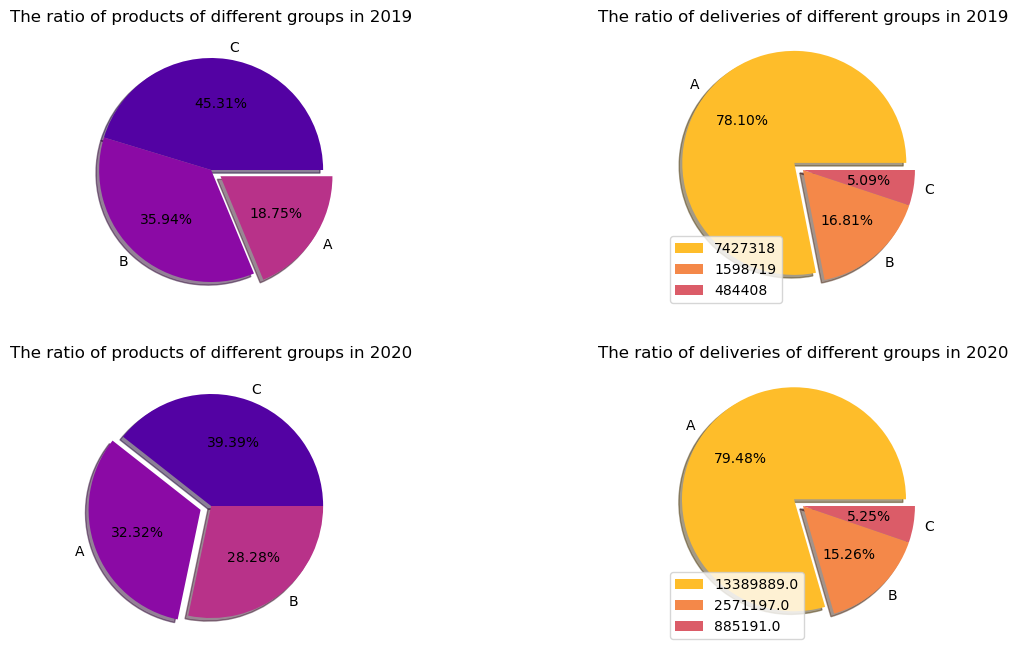

In [31]:
# Visualize this data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

#2019 year
#count chart
axs[0, 0].pie(x=abc_count.values, labels=abc_count.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0, 0.1), shadow=True)
axs[0, 0].set_title('The ratio of products of different groups in 2019', fontsize=12)

#sum chart
axs[0, 1].pie(x=abc_sum['Delivery amount'], labels=abc_sum['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[0, 1].set_title('The ratio of deliveries of different groups in 2019', fontsize=12)
axs[0, 1].legend(abc_sum['Delivery amount'], loc=3)

#2020 year
#count chart
axs[1, 0].pie(x=abc_count_20.values, labels=abc_count_20.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0.1, 0), shadow=True)
axs[1, 0].set_title('The ratio of products of different groups in 2020', fontsize=12)

#sum chart
axs[1, 1].pie(x=abc_sum_20['Delivery amount'], labels=abc_sum_20['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[1, 1].set_title('The ratio of deliveries of different groups in 2020', fontsize=12)
axs[1, 1].legend(abc_sum_20['Delivery amount'], loc=3)


plt.show()

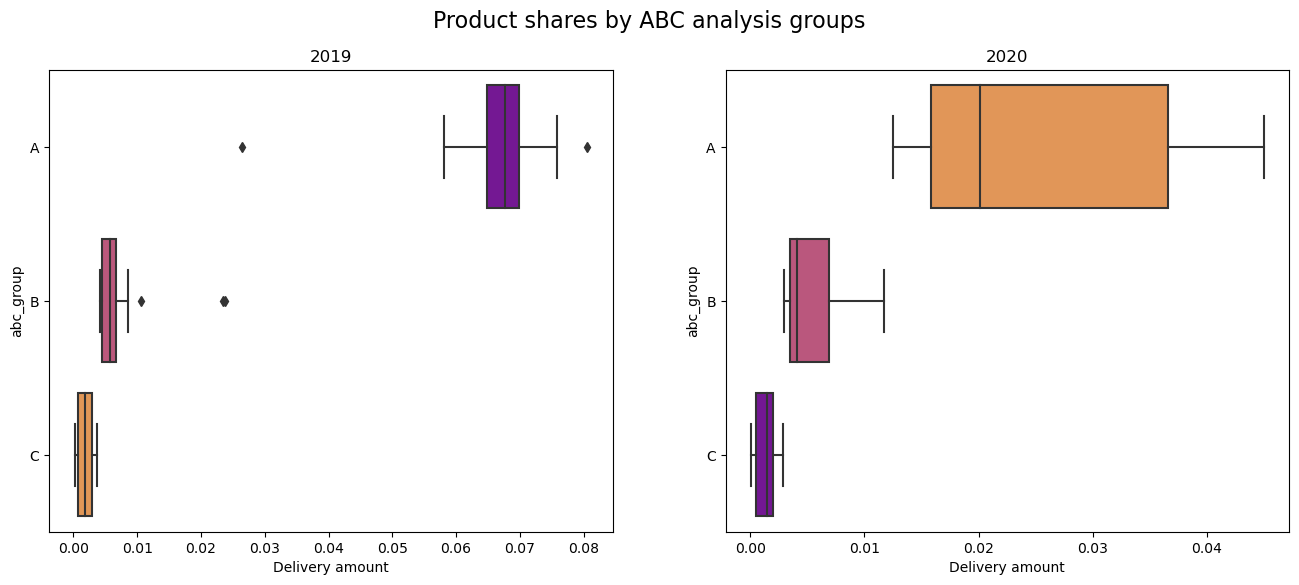

In [32]:
# Boxplot

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Product shares by ABC analysis groups', fontsize=16)

#2019
sns.boxplot(x=dfsale_2019['Delivery amount']/dfsale_2019['Delivery amount']\
            .sum(), ax=axs[0], palette='plasma', y=dfsale_2019['abc_group'])

#2020
sns.boxplot(x=dfsale_2020['Delivery amount']/dfsale_2020['Delivery amount']\
            .sum(), ax=axs[1], palette='plasma_r', y=dfsale_2020['abc_group'])

axs[0].title.set_text('2019')
axs[1].title.set_text('2020')


plt.show()

Pareto law worked in 2019 since 20% of the total sales were attributed to 80% of orders.<br>
However in 2020, 80% of the sales were attributed to 32% of the products.<br> According to the second graph, there is a general range expansion and a negative shift of the median.<br><br>

**Hypothesis 1:**<br>The range expansion may indicate that there were 'A' category items that were removed in 2020.<br><br>

**Hypothesis 2:**<br>The range expansion may indicate that more products (possibly 2020 additions) are responsible for the total number of sales in each group. The mean of all groups has shifted towards the left. The left skewed distribution indicates that a bigger portion of the products (relative to 2019) within the group is responsible for the total number of sales within it.<br><br>


<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Testing Hypothesis 1</h1>

**Hypothesis 1:**<br>The range expansion may indicate that there were 'A' category items that were removed in 2020.<br><br>
Lets find the items that were removed and how significant they were.

In [33]:
# Creating list with 'A' products in 2019
AGroup_2019 = dfsale_2019.loc[dfsale_2019['abc_group']=='A', 'Product code'].to_list()
AGroup_2019

[497253,
 497034,
 497037,
 497031,
 497035,
 497033,
 497028,
 497030,
 497032,
 497029,
 497036,
 234028]

In [34]:
# Turning list to data frame and adding Delivery column
AGroup_2019 = pd.DataFrame(AGroup_2019, columns=['Product code'])

# Excluding 2020 Products to find which were removed
AGroupCode = AGroup_2019[~AGroup_2019['Product code'].isin(data_2020['Product code'].to_list())]
AGroupCode.head(20)

,Product code
2,497037
3,497031
4,497035
5,497033
9,497029
10,497036


In [35]:
# Adding these codes to a list
AGroupCode = AGroupCode['Product code'].to_list()

In [36]:
# How many deliveries were those products responsible for
AGroupSum = data_2019[data_2019['Product code'].isin(AGroupCode)]['Delivery amount'].sum()
AGroupSum

3791398

In [37]:
# Removed products: Percentage of 2019 sales
AGroupSum / data_2019['Delivery amount'].sum()*100

39.86562142991206

So the removed products were responsible for **7,791,398** **deliveries** and attributed **40% of the total 2019 sales**.

In [38]:
# Let's check the new A group products of 2020
AGroupCodeSup = AGroup_2019[AGroup_2019['Product code'].isin(data_2020['Product code'].to_list())]

In [39]:
# New 2020 products delivery sum
AGroupSumSup = data_2020[data_2020['Product code']\
                         .isin(AGroupCodeSup['Product code'].to_list())]\
                         .agg({'Delivery amount': 'sum'})
AGroupSumSup

Delivery amount    506094.0
dtype: float64

In [40]:
# New products: Percentage of 2020 sales
AGroupSumSup / data_2020['Delivery amount'].sum()*100

Delivery amount    3.004189
dtype: float64

So the new products were responsible for **506,094 deliveries** and attributed **3% of the total 2020 sales**.<br><br>
The **6 products** that were removed in 2020 were responsible for **40% of the total sales in 2019**.

<hr>
<h1 style="
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:35px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Testing Hypothesis 2</h1>

**Hypothesis 2:**<br><br>
New, well performing, products were introduced in 2020.

In [41]:
# New products brought in 2020
len(data_2020['Product code'].value_counts()) - len(data_2019['Product code'].value_counts())

35

Let's check how many deliveries and what percentage of the total 2020 sales, these products are responsible for.

In [42]:
# delivery sum of unique 2020 products
sum_new_2020 = data_2020[~data_2020['Product code'].isin(code)]['Delivery amount'].sum()

# percentage of the total 2020 sales
sum_new_2020/dfsale_2020['Delivery amount'].sum()*100 ,sum_new_2020

(89.61193621593662, 15096275.0)

So the **35 new products** are responsible for **15,096,275 deliveries** and amounted to **90% of the total supply in 2020**.

<hr>
<h1 style="
          text-align: center;
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:38px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Client Analysis</h1>

Finding delivery increase for each individual client throughout 2019 and 2020.<br>
* 1st Table: 2019 client list<br>
* 2nd Table: 2020 client list<br>
* 3rd Table: Delivery increase between 2019 and 2020

In [43]:
# For 2019: Delivery amount per client
shop_2019 = data_2019.groupby(['Client ID'], as_index=False)\
    .agg({'Delivery amount':'sum', 'Date of delivery':'count'})\
    .sort_values(by='Delivery amount', ascending=False)
shop_2019

,Client ID,Delivery amount,Date of delivery
20,7167,1394776,46
12,7136,879094,24
6,7126,609863,14
3,7118,594290,13
19,7161,500806,13
1,7111,495917,11
7,7128,481214,11
8,7129,478618,12
4,7121,469834,14
10,7134,454521,13


In [44]:
# For 2020: Delivery amount per client
shop_2020 = data_2020.groupby(['Client ID'], as_index=False)\
    .agg({'Delivery amount':'sum', 'Date of delivery':'count'})\
    .sort_values(by='Delivery amount', ascending=False)
shop_2020

,Client ID,Delivery amount,Date of delivery
18,7158,2035274.0,66
10,7134,1479166.0,41
19,7161,1421475.0,39
12,7136,1296929.0,41
6,7126,1105069.0,32
3,7118,1082123.0,31
4,7121,797343.0,23
15,7140,737001.0,17
20,7167,712610.0,23
16,7146,687517.0,22


In [45]:
# Combine 2019 and 2020 data

sales_to_shops = shop_2019.merge(shop_2020, left_on='Client ID', right_on='Client ID', suffixes=('_2019', '_2020'))


# Delivery amount increase

sales_to_shops['Delivery amount increase'] = sales_to_shops['Delivery amount_2020'] - sales_to_shops['Delivery amount_2019']

# Delivery amount increase [%]

sales_to_shops['Growth of delivery amount %'] = \
    (sales_to_shops['Delivery amount_2020']/sales_to_shops['Delivery amount_2019'])* 100 - 100

In [46]:
sales_to_shops.sort_values(by=['Delivery amount increase'], ascending=False)

,Client ID,Delivery amount_2019,Date of delivery_2019,Delivery amount_2020,Date of delivery_2020,Delivery amount increase,Growth of delivery amount %
18,7158,218986,6,2035274.0,66,1816288.0,829.408273
9,7134,454521,13,1479166.0,41,1024645.0,225.434028
4,7161,500806,13,1421475.0,39,920669.0,183.837454
19,7140,50208,2,737001.0,17,686793.0,1367.895554
20,7135,41474,2,566693.0,17,525219.0,1266.381347
2,7126,609863,14,1105069.0,32,495206.0,81.199548
3,7118,594290,13,1082123.0,31,487833.0,82.086692
1,7136,879094,24,1296929.0,41,417835.0,47.530184
17,7139,281316,11,652626.0,17,371310.0,131.990360
15,7138,323719,11,673481.0,26,349762.0,108.044940


The last 2 columns indicate the delivery amount increase for evey customer from 2019 to 2020.

<hr>
<h1 style="
          text-align: center;
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:38px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> RFM Analysis
</h1>

Through **RFM** analysis we can create a profile for each client based on:<br>
* **R**ecency: how recently he purchased<br>
* **F**requency: how often he purchases<br>
* **M**onetery value: how much he purchases

In [47]:
# Join the two data sets
data = pd.concat([data_2019, data_2020])

In [48]:
# date of last delivery
last_delivery = data.groupby('Client ID', as_index=False).agg({'Date of delivery':'max'})

In [49]:
# Adding last_delivery to data
RFM = sales_to_shops.merge(last_delivery, left_on='Client ID', right_on='Client ID')
RFM.head()

,Client ID,Delivery amount_2019,Date of delivery_2019,Delivery amount_2020,Date of delivery_2020,Delivery amount increase,Growth of delivery amount %,Date of delivery
0,7167,1394776,46,712610.0,23,-682166.0,-48.908642,2020-12-16
1,7136,879094,24,1296929.0,41,417835.0,47.530184,2020-10-15
2,7126,609863,14,1105069.0,32,495206.0,81.199548,2020-12-24
3,7118,594290,13,1082123.0,31,487833.0,82.086692,2020-10-27
4,7161,500806,13,1421475.0,39,920669.0,183.837454,2020-10-22


In [50]:
#Rename the columns to better match the stored values
RFM = RFM.rename(columns={'Date of delivery': 'Last Delivery Date', \
                          'Date of delivery_2019' : 'Deliveries in 2019',\
                          'Date of delivery_2020' : 'Deliveries in 2020'})
RFM.head()

,Client ID,Delivery amount_2019,Deliveries in 2019,Delivery amount_2020,Deliveries in 2020,Delivery amount increase,Growth of delivery amount %,Last Delivery Date
0,7167,1394776,46,712610.0,23,-682166.0,-48.908642,2020-12-16
1,7136,879094,24,1296929.0,41,417835.0,47.530184,2020-10-15
2,7126,609863,14,1105069.0,32,495206.0,81.199548,2020-12-24
3,7118,594290,13,1082123.0,31,487833.0,82.086692,2020-10-27
4,7161,500806,13,1421475.0,39,920669.0,183.837454,2020-10-22


<hr>
<h1 style="
          text-align: center;
           ">Monetery

In [51]:
# Monetery
RFM['Delivery amount'] = RFM['Delivery amount_2019'] + RFM['Delivery amount_2020']

<hr>
<h1 style="
          text-align: center;
           ">Frequency

In [52]:
# Frequency
RFM['Frequency of deliveries'] = RFM['Deliveries in 2019'] + RFM['Deliveries in 2020']

In [53]:
# Removing unnecessary columns
RFM = RFM.drop(['Delivery amount_2019', 'Delivery amount_2020', 'Deliveries in 2019', 'Deliveries in 2020'], axis=1)

<hr>
<h1 style="
          text-align: center;
           ">Recency

In [54]:
# Setting current date
RFM['Current date'] = '2021-01-01'
# Adding to dataframe in date format
RFM['Current date']=pd.to_datetime(RFM['Current date'], format='%Y-%m-%d')

In [55]:
# Recency
RFM['Late Date'] = RFM['Current date'] - RFM['Last Delivery Date']

In [56]:
# Removing unnecessary columns
RFM_analisys = RFM[['Client ID', 'Delivery amount increase', 'Growth of delivery amount %', \
                    'Late Date', 'Frequency of deliveries', 'Delivery amount']]

In [57]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
RFM_analisys.describe()

,Client ID,Delivery amount increase,Growth of delivery amount %,Late Date,Frequency of deliveries,Delivery amount
count,21.0,21.0,21.0,21,21.0,21.0
mean,7134.4,349325.3,215.0,72 days 18:17:08.571428571,37.0,1255082.0
std,16.1,502958.1,408.7,46 days 00:54:36.661713827,16.7,549186.9
min,7110.0,-682166.0,-48.9,8 days 00:00:00,19.0,608167.0
25%,7125.0,95765.0,20.3,29 days 00:00:00,24.0,850274.0
50%,7134.0,327509.0,69.7,72 days 00:00:00,30.0,997200.0
75%,7140.0,495206.0,132.0,107 days 00:00:00,46.0,1714932.0
max,7167.0,1816288.0,1367.9,149 days 00:00:00,72.0,2254260.0


We mean to use quantiles to get to our RFM analysis. We can use the 25%, 50% and 75% points to represent the range of values for the last three columns.<br>
* **Recency(Late Date):** 29 [25%] - 72 [50%] - 107 [75%]<br>
* **Frequency(of deliveries):** 24 [25%] - 30 [50%] - 46 [75%]<br>
* **Monetery(Delivery amount):** 850274 [25%] - 997200 [50%] - 1714932 [75%]<br><br>
Based on those quantiles we can create a profile for each client.

<hr>
<h1 style="
          text-align: center;
           ">Categorization 1, 2, 3

In [58]:
RFM_analisys['Late Date'] = RFM_analisys['Late Date'].dt.days

In [59]:
# Recency

RFM_analisys['Recency'] = RFM_analisys['Late Date']\
        .apply(lambda x: 3 if x <= 29 else (2 if 29 < x <=72 else 1))

In [60]:
# Frequency

RFM_analisys['Frequency'] = RFM_analisys['Frequency of deliveries']\
        .apply(lambda x: 3 if x <= 46 else (2 if 30 <= x <=46 else 1))

In [61]:
# Monetery

RFM_analisys['Monetary'] = RFM_analisys['Delivery amount'].\
        apply(lambda x: 3 if x >= 1714932 else (2 if 997200 <= x <1714932 else 1))

In [62]:
RFM_analisys = RFM_analisys[['Client ID', 'Delivery amount increase', \
                             'Growth of delivery amount %', 'Recency', 'Frequency', 'Monetary']]
RFM_analisys

,Client ID,Delivery amount increase,Growth of delivery amount %,Recency,Frequency,Monetary
0,7167,-682166.0,-48.9,3,1,3
1,7136,417835.0,47.5,1,1,3
2,7126,495206.0,81.2,3,3,3
3,7118,487833.0,82.1,2,3,2
4,7161,920669.0,183.8,2,1,3
5,7111,-156860.0,-31.6,1,3,1
6,7128,97885.0,20.3,3,3,2
7,7129,-78181.0,-16.3,2,3,1
8,7121,327509.0,69.7,3,3,2
9,7134,1024645.0,225.4,3,1,3


<hr>
<h1 style="
          text-align: center;
           ">Client status

However it would still be difficult for the manager to make a decision based on that data. Let us further profile the clients and visualize the result in a better manner.<br>

* **lost**: R1—F1—M(1–3)
* **loyal**: customers who have lost activity: R1—F(2–3)—M(1–3)
* **sleeping**: R2-F(1-2)-M(1-3)
* **loyal sleeping customers**: R2—F(3)—M(1–3)
* **beginners**: R3-F1-M(1-3)
* **developing**: R3-F2-M(1-3)
* **regular customers**: R3-F3-M3
<br><br>We can group the clients based on the features written above. 

In [63]:
# Conditions
def RFM_loyalty(r, f, m):
    temp = list()
    for i in range(len(r)):
        if r[i] == 1:
            if f[i] == 1:
                temp.append('Lost')
            else:
                temp.append('Loyal customers who have lost activity')
        elif r[i] == 2:
            if 1<=f[i]<=2:
                temp.append('Sleeping')
            else:
                temp.append('loyal sleeping customers')
        else:
            if f[i] == 1:
                temp.append('Beginners')
            elif f[i] == 2:
                temp.append('Developing')
            else:
                temp.append('Regular customers')
    return temp


# Creating Loyalty column
RFM_analisys['Loyalty'] = RFM_loyalty(RFM_analisys.loc[:, 'Recency'], \
                                        RFM_analisys.loc[:, 'Frequency'], RFM_analisys.loc[:, 'Monetary'])

# Adding purchase growth for each group
RFM_analisys.groupby('Loyalty', as_index=False)\
    .agg({'Client ID':'count', 'Delivery amount increase': 'sum', 'Growth of delivery amount %': 'median'})\
    .sort_values(by='Delivery amount increase', ascending=False)

,Loyalty,Client ID,Delivery amount increase,Growth of delivery amount %
1,Lost,2,2234123.0,438.5
5,loyal sleeping customers,4,1446207.0,95.1
2,Loyal customers who have lost activity,8,1422002.0,33.0
3,Regular customers,4,970352.0,45.0
4,Sleeping,1,920669.0,183.8
0,Beginners,2,342479.0,88.3


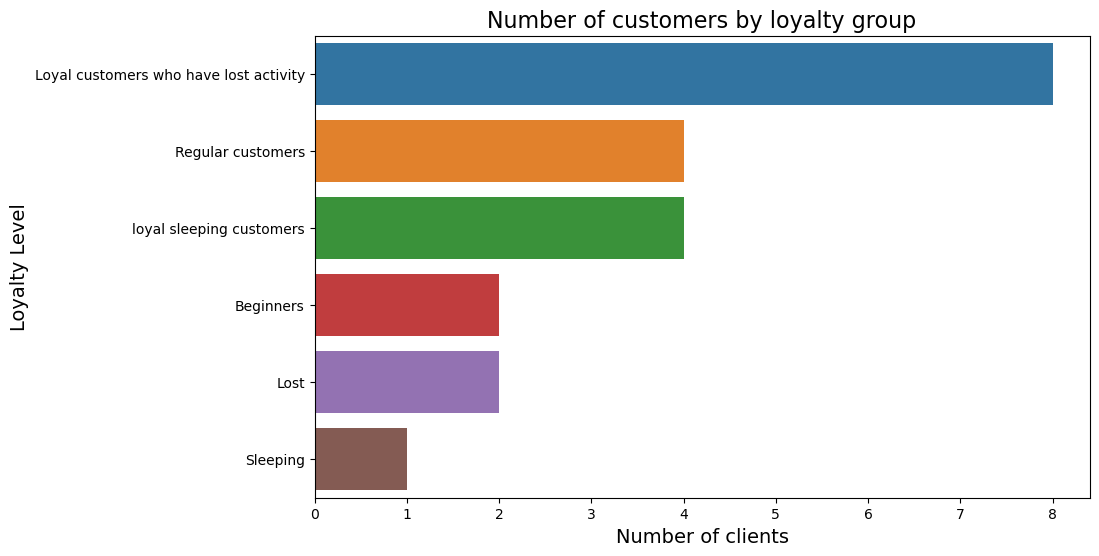

In [64]:
# Number of clients in each group
loyalty_groups=RFM_analisys['Loyalty'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_groups.values, y=loyalty_groups.index)
plt.title('Number of customers by loyalty group', fontsize=16)
plt.xlabel('Number of clients', fontsize=14)
plt.ylabel('Loyalty Level', fontsize=14)
plt.show()

The following table can help us identify the big clients and their current Loyalty status.

In [65]:
# Identifying important customers and their Loyalty status
RFM_analisys.sort_values(by='Delivery amount increase', ascending=False)

,Client ID,Delivery amount increase,Growth of delivery amount %,Recency,Frequency,Monetary,Loyalty
18,7158,1816288.0,829.4,1,1,3,Lost
9,7134,1024645.0,225.4,3,1,3,Beginners
4,7161,920669.0,183.8,2,1,3,Sleeping
19,7140,686793.0,1367.9,2,3,1,loyal sleeping customers
20,7135,525219.0,1266.4,1,3,1,Loyal customers who have lost activity
2,7126,495206.0,81.2,3,3,3,Regular customers
3,7118,487833.0,82.1,2,3,2,loyal sleeping customers
1,7136,417835.0,47.5,1,1,3,Lost
17,7139,371310.0,132.0,1,3,1,Loyal customers who have lost activity
15,7138,349762.0,108.0,2,3,2,loyal sleeping customers


<hr>
<h1 style="
          text-align: center;
          border-radius:5px; 
          background-color: #37373b; 
          color:#f5f2e9; 
          padding:15px;
          letter-spacing: 2px; 
          font-family: 'JetBrains Mono';
          font-size:38px;
          border-left: 3px solid #f2bd1d; 
          border-bottom: 3px outset #f2bd1d;
          margin-bottom: 10px;"> Seller Revenue Analysis (Seasonality)</h1>

We aim to see whether there is seasonality based on the 2019 and 2020 data. We visualize the Delivery amount for each month and look for a repeating pattern between the two years.

In [66]:
# Extracting the month from the date column
data_2019['Month'] = data_2019['Date of delivery'].dt.month
data_2020['Month'] = data_2020['Date of delivery'].dt.month

# Grouping data by month and keeping the median of the Delivery amount
pivot_2019 = data_2019.groupby('Month', as_index=False).agg({'Delivery amount':['median']})
pivot_2020 = pd.pivot_table(data_2020, index=['Month'], aggfunc={'Delivery amount': [np.median],}).reset_index()

pivot_2019,
pivot_2020

,Month,Delivery amount
,,median
0,1,35503.0
1,2,36301.0
2,3,28194.5
3,4,27543.5
4,5,21949.0
5,6,33641.5
6,7,36527.0
7,8,38005.0
8,9,27851.0


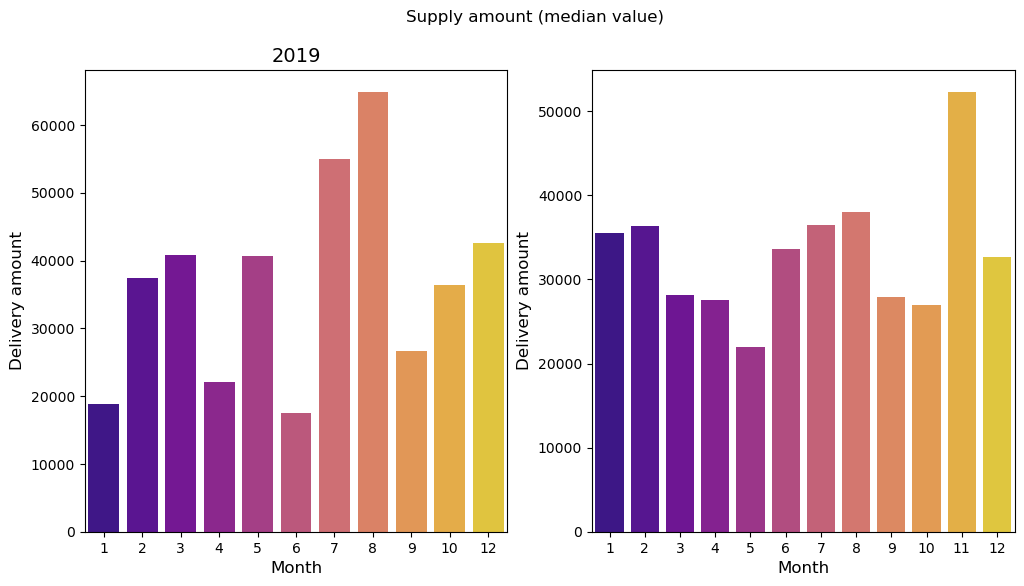

In [67]:
# Plotting Delivery amount per month for 2019 and 2020
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Supply amount (median value)')
sns.barplot(x=pivot_2019['Month'], y=pivot_2019['Delivery amount', 'median'], ax=axs[0], palette='plasma')
axs[0].set_title('2019', fontsize=14)
axs[0].set_ylabel('Delivery amount', fontsize=12)
axs[0].set_xlabel('Month', fontsize=12)
sns.barplot(x=pivot_2020['Month'], y=pivot_2020['Delivery amount', 'median'], ax=axs[1], palette='plasma')
axs[1].set_ylabel('Delivery amount', fontsize=12)
axs[1].set_xlabel('Month', fontsize=12)
plt.show()

There appears to be no seasonality.